In [41]:
import os
from PIL import Image, ImageOps, ImageChops
import numpy as np
from tensorflow import keras 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [42]:
#PARAMETERS
SIZE = 100
SEED = 23

## Load Data

In [43]:
def loadData(path):
    filelist=os.listdir(path)
    class_list = []
    current_class_counter = 0
    
    all_images = []
    all_labels = []
    
    # Iterate through class folders in path
    for current_class in filelist:
        if current_class[0] == ".":
            continue
        print(current_class)
        class_list.append(current_class)
        class_path = os.listdir(path+"/"+current_class)
        
        # iterate through images in class folders
        for image in class_path:
            if image[0] == ".":
                continue
            #print(image)
            # Bild an all_images anhängen
            temp = Image.open(path+"/"+current_class+"/"+image)
            keep = temp.copy()
            all_images.append(keep)
            temp.close()
            
            # Label an all_labels anhängen
            all_labels.append(current_class_counter)
        
        current_class_counter += 1
        
    print(len(all_images)," images loaded")
        
    return all_images, all_labels, class_list

In [44]:
train_images, train_labels, train_class_list = loadData("Data/train_data")

Bicycle
Bridge
Bus
Car
Chimney
Crosswalk
Hydrant
Motorcycle
Other
Palm
Stair
Traffic Light
2432  images loaded


In [45]:
val_images, val_labels, val_class_list = loadData("Data/val_data")

Bicycle
Bridge
Bus
Car
Chimney
Crosswalk
Hydrant
Motorcycle
Other
Palm
Stair
Traffic Light
542  images loaded


In [46]:
#all_images, all_labels, class_list = loadData("Data/train_val_data")

In [47]:
def checkCorrectnesOfLabels(image_list, label_list, class_list, i):
    print(class_list[label_list[i]])
    display(image_list[i])

Bicycle


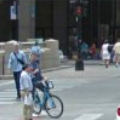

In [48]:
checkCorrectnesOfLabels(train_images, train_labels, train_class_list, 1)

Bicycle


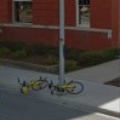

In [49]:
checkCorrectnesOfLabels(val_images, val_labels, val_class_list, 9)

## Get Overview of data

In [50]:
train_images[0].width

120

In [51]:
all_widths = []
all_heights = []
for image in train_images:
    all_widths.append(image.width)
    if image.width == 120:
        all_heights.append(image.height)
        
# -> größe der Bilder immer 100x100 oder 120x120

In [52]:
np.unique(all_widths)

array([100, 120])

## Datenpreprocessing:

In [53]:
def resizeImages(list_images):
    # Daten einheitlich auf 120x120 hochskalieren
    for i in range(len(list_images)):
        if list_images[i].width != SIZE:
            #display(list_images[i])
            new_image = list_images[i].resize((SIZE, SIZE))
            #display(new_image)

            list_images[i] = new_image
    return list_images

In [54]:
train_images = resizeImages(train_images)

In [55]:
val_images = resizeImages(val_images)

In [56]:
def checkFourthValue(list_images):
    # prüfen ob 4. wert immer 255 ist
    min_value = 2300

    for image in list_images:
        np_img = np.array(list_images[0])
        #print(np_img.shape)
        if np_img[:,:,3].min() < min_value:
            min_value = np_img[:,:,3].min()

    print(min_value)

    # -> Wert bei 4. dimension immer 255 -> kann man weglassen

In [57]:
checkFourthValue(train_images)

255


## !!!!!EVENIZING!!!!!

In [58]:
# put all togethaaaaaaa
all_images = train_images + val_images
all_labels = train_labels + val_labels
all_class_list = train_class_list

#### Overview

In [59]:
def getOverviewAmount(images, labels, class_list, return_amount_motorcycle = False, display_images = False):
    np_label = np.array(labels)
    np_images = np.array(images)
    amount_motorcycles = 0
    
    for i in range(len(class_list)):
        label_images = np_images[np_label == i]
        print(class_list[i],len(label_images))
        if class_list[i] == "Motorcycle":
            amount_motorcycles = len(label_images)
        if display_images:
            display(label_images[0])
    
    if return_amount_motorcycle:
        return amount_motorcycles
    else:
        return 

In [60]:
getOverviewAmount(all_images, all_labels, all_class_list)

Bicycle 197
Bridge 136
Bus 308
Car 895
Chimney 41
Crosswalk 316
Hydrant 242
Motorcycle 20
Other 332
Palm 231
Stair 54
Traffic Light 202


C:\Users\Jakob\AppData\Local\Temp\ipykernel_1528\3128694580.py:3: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  np_images = np.array(images)
C:\Users\Jakob\AppData\Local\Temp\ipykernel_1528\3128694580.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np_images = np.array(images)


#### Splitten

In [61]:
def splitData(images, labels, class_list, split_size = 0.2, rnd = SEED):
    X_train = np.array([])
    X_test = []
    y_train = []
    y_test = []
    
    np_label = np.array(labels)
    np_images = np.array(images)
    
    for i in range(len(class_list)):
        label_images = np_images[np_label == i]
        label_label = np_label[np_label == i]
        
        X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(label_images, label_label, test_size=split_size, random_state=rnd)
        
        X_train = np.append(X_train, X_train_temp)
        X_test = np.append(X_test, X_test_temp)
        y_train = np.append(y_train, y_train_temp)
        y_test = np.append(y_test, y_test_temp)

        
        testen = """
        print(class_list[i])
        for j in range(5):
            display(label_images[j])  
        """
    return X_train, X_test, y_train, y_test

In [62]:
image_train, image_test, label_train, label_test = splitData(all_images, all_labels, all_class_list)

C:\Users\Jakob\AppData\Local\Temp\ipykernel_1528\1804048183.py:8: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  np_images = np.array(images)
C:\Users\Jakob\AppData\Local\Temp\ipykernel_1528\1804048183.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np_images = np.array(images)


In [63]:
train_amount_motorcycle = getOverviewAmount(image_train, label_train, all_class_list, return_amount_motorcycle=True)

Bicycle 157
Bridge 108
Bus 246
Car 716
Chimney 32
Crosswalk 252
Hydrant 193
Motorcycle 16
Other 265
Palm 184
Stair 43
Traffic Light 161


In [64]:
train_amount_motorcycle

16

In [65]:
test_amount_motorcycle = getOverviewAmount(image_test, label_test, all_class_list, return_amount_motorcycle=True)

Bicycle 40
Bridge 28
Bus 62
Car 179
Chimney 9
Crosswalk 64
Hydrant 49
Motorcycle 4
Other 67
Palm 47
Stair 11
Traffic Light 41


In [66]:
test_amount_motorcycle

4

#### EVENAIZZZZ

In [67]:
# Evenizen mit 3-fachem vom Motorcycle

## Convert to np_array

In [68]:
def convertImageToNp(list_images):
    all_np_images = []
    for image in list_images:
        current_image = np.array(image)
        

        # 4. wert bei rgb weg machen
        current_image = current_image[:, :, :3]
        #print(current_image.shape)

        all_np_images.append(current_image)

    return np.array(all_np_images)

In [69]:
train_images_np2 = convertImageToNp(image_train)
val_images_np2 = convertImageToNp(image_test)

In [70]:
train_images_np2.shape

(2373, 100, 100, 3)

In [71]:
train_images_np2.shape

(2373, 100, 100, 3)

## Convert Label to OneHot

In [72]:
def convertToOneHot(labels):
    all_labels_np = np.array(labels)
    onehot_labels = np.zeros((all_labels_np.size, all_labels_np.max() + 1))
    onehot_labels[np.arange(all_labels_np.size), all_labels_np] = 1
    return onehot_labels

In [73]:
label_train

array([ 0.,  0.,  0., ..., 11., 11., 11.])

In [74]:
train_labels_oh2 = convertToOneHot(label_train.astype("uint8"))

In [75]:
val_labels_oh2 = convertToOneHot(label_test.astype("uint8"))

In [76]:
train_labels_oh2.shape

(2373, 12)

In [77]:
train_labels_oh2

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Splitten in train und val daten

## Build ImageDataGenerator

In [78]:
from keras.preprocessing.image import ImageDataGenerator


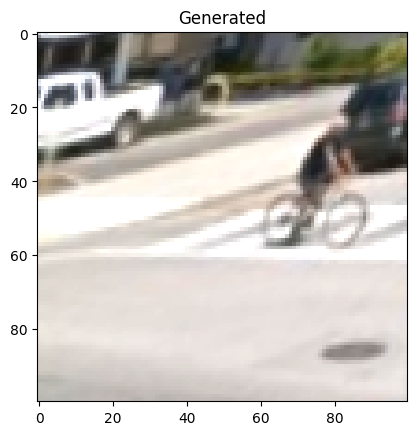

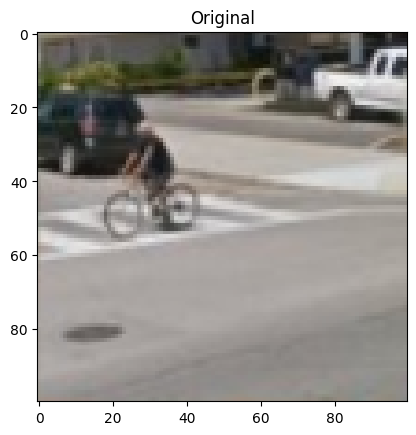

In [79]:
gen = ImageDataGenerator(rotation_range = 15, 
                         width_shift_range = (-5, 5), 
                         height_shift_range = (-5, 5), 
                         brightness_range = (1, 1.8),# (0.5,1.5), 
                         fill_mode= "reflect",
                         horizontal_flip = True,
                         shear_range=30,
                         zoom_range=[0.9, 1]
                         #validation_split=0.2
                         )


for batch in gen.flow(x = train_images_np2, y = train_labels_oh2, batch_size = 1, shuffle=False):
    
    first_image = Image.fromarray(batch[0][0].astype("uint8"))
    plt.imshow(first_image)
    plt.title("Generated")
    plt.show()
    plt.imshow(train_images_np2[0])
    plt.title("Original")
    plt.show()
    
    break

## Load CNN Model

In [80]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from keras.models import Model
import time
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import math

In [82]:
# ResNet aufbauen
model_input = keras.Input(shape=(SIZE, SIZE, 3))

resnet50 = keras.applications.ResNet50(
    weights="imagenet", include_top=False, input_tensor=model_input
)

x1 = Flatten()(resnet50.output)
x2 = Dropout(0.2, seed = SEED)(x1)
x3 = Dense(128, activation="relu")(x2)
prediction = Dense(12, activation="softmax")(x3) 

resnet_model = Model(inputs = resnet50.input, outputs = prediction)

In [83]:
# kompilieren
resnet_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0004), # oder: , rmsprop
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),# "categorical_crossentropy", # keras.losses.CategoricalCrossentropy(from_logits=True)
              metrics=["accuracy"])  

In [84]:
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']         

 conv2_block3_2_conv (Conv2D)   (None, 25, 25, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 25, 25, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 25, 25, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 25, 25, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 13, 13, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 13, 13, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 13, 13, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 13, 13, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_2_conv (Conv2D)   (None, 7, 7, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 7, 7, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 7, 7, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 7, 7, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block5_2_relu (Activatio  (None, 7, 7, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 7, 7, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 7, 7, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 7, 7, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
          

 conv5_block2_2_relu (Activatio  (None, 4, 4, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 4, 4, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 4, 4, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 4, 4, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
          

In [85]:
MODELNAME = "resnetv5"

# Set distinct name
NAME = MODELNAME+"{}".format(int(time.time()))

# Set filepath
checkpoint_filepath = 'goodModels/{}'.format(NAME)

# set up callback
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy', # val_accuracy
    mode='max',
    save_best_only=True)

callbacks = [
    EarlyStopping(monitor="val_accuracy", patience=15), #val_accuracy
    model_checkpoint_callback,
    #tensorboard
]

In [86]:
3*train_amount_motorcycle*12

576

In [87]:
3*test_amount_motorcycle*12

144

In [88]:
X_train = train_images_np2
y_train = train_labels_oh2
X_val = val_images_np2
y_val = val_labels_oh2

train_batch_size = 32
test_batch_size = 32
history = resnet_model.fit(gen.flow(X_train, y_train, batch_size=train_batch_size, shuffle=True), 
                           validation_data=gen.flow(X_val, y_val, batch_size=test_batch_size, shuffle=True),
                           steps_per_epoch=math.ceil(len(X_train)/train_batch_size), 
                           epochs=100, workers=8, callbacks= callbacks)

Epoch 1/100


C:\Users\Jakob\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


75/75 [==============================] - ETA: 0s - loss: 1.9584 - accuracy: 0.4678

INFO:tensorflow:Assets written to: goodModels\resnetv51676141263\assets


INFO:tensorflow:Assets written to: goodModels\resnetv51676141263\assets


75/75 [==============================] - 17s 174ms/step - loss: 1.9584 - accuracy: 0.4678 - val_loss: 3.9881 - val_accuracy: 0.4143
Epoch 2/100
75/75 [==============================] - ETA: 0s - loss: 1.2000 - accuracy: 0.6262

INFO:tensorflow:Assets written to: goodModels\resnetv51676141263\assets


INFO:tensorflow:Assets written to: goodModels\resnetv51676141263\assets


75/75 [==============================] - 13s 166ms/step - loss: 1.2000 - accuracy: 0.6262 - val_loss: 2.1729 - val_accuracy: 0.4459
Epoch 3/100
75/75 [==============================] - ETA: 0s - loss: 0.9589 - accuracy: 0.6932

INFO:tensorflow:Assets written to: goodModels\resnetv51676141263\assets


INFO:tensorflow:Assets written to: goodModels\resnetv51676141263\assets


75/75 [==============================] - 13s 164ms/step - loss: 0.9589 - accuracy: 0.6932 - val_loss: 1.8181 - val_accuracy: 0.5857
Epoch 4/100
75/75 [==============================] - ETA: 0s - loss: 0.9222 - accuracy: 0.7193

INFO:tensorflow:Assets written to: goodModels\resnetv51676141263\assets


INFO:tensorflow:Assets written to: goodModels\resnetv51676141263\assets


75/75 [==============================] - 13s 166ms/step - loss: 0.9222 - accuracy: 0.7193 - val_loss: 1.3294 - val_accuracy: 0.5940
Epoch 5/100
75/75 [==============================] - 5s 57ms/step - loss: 0.8000 - accuracy: 0.7408 - val_loss: 1.5557 - val_accuracy: 0.5624
Epoch 6/100
75/75 [==============================] - ETA: 0s - loss: 0.6942 - accuracy: 0.7750

INFO:tensorflow:Assets written to: goodModels\resnetv51676141263\assets


INFO:tensorflow:Assets written to: goodModels\resnetv51676141263\assets


75/75 [==============================] - 12s 160ms/step - loss: 0.6942 - accuracy: 0.7750 - val_loss: 1.0728 - val_accuracy: 0.6922
Epoch 7/100
75/75 [==============================] - 5s 56ms/step - loss: 0.6093 - accuracy: 0.7998 - val_loss: 1.8222 - val_accuracy: 0.5707
Epoch 8/100
75/75 [==============================] - 4s 57ms/step - loss: 0.6628 - accuracy: 0.7906 - val_loss: 1.1270 - val_accuracy: 0.6356
Epoch 9/100
75/75 [==============================] - 4s 56ms/step - loss: 0.5412 - accuracy: 0.8209 - val_loss: 1.4327 - val_accuracy: 0.6190
Epoch 10/100
75/75 [==============================] - 4s 56ms/step - loss: 0.4917 - accuracy: 0.8382 - val_loss: 1.1834 - val_accuracy: 0.6240
Epoch 11/100
75/75 [==============================] - 4s 56ms/step - loss: 0.4824 - accuracy: 0.8416 - val_loss: 2.1923 - val_accuracy: 0.5424
Epoch 12/100
75/75 [==============================] - 4s 56ms/step - loss: 0.5477 - accuracy: 0.8213 - val_loss: 1.2480 - val_accuracy: 0.6406
Epoch 13/100


## Model neu laden

In [89]:
vgg16_nachtr = keras.models.load_model("goodModels/resnetv51676141263/")

In [90]:
# kompilieren
vgg16_nachtr.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00005), # oder: , rmsprop
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),# "categorical_crossentropy", # keras.losses.CategoricalCrossentropy(from_logits=True)
              metrics=["accuracy"])  

In [91]:
MODELNAME_nachtr = "Versuch5"

# Set distinct name
NAME_nachtr = MODELNAME_nachtr+"{}".format(int(time.time()))

# Set filepath
checkpoint_filepath_nachtr = 'goodModels/{}'.format(NAME_nachtr)

# set up callback
model_checkpoint_callback_nachtr = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath_nachtr,
    save_weights_only=False,
    monitor='val_accuracy', # val_accuracy
    mode='max',
    save_best_only=True)

callbacks_nachtr = [
    EarlyStopping(monitor="val_accuracy", patience=15), #val_accuracy
    model_checkpoint_callback_nachtr,
    #tensorboard
]

In [92]:
BATCH_SIZE = 32

history = vgg16_nachtr.fit(gen.flow(X_train, y_train, batch_size=BATCH_SIZE, shuffle=True), 
                           validation_data=gen.flow(X_val, y_val, batch_size=BATCH_SIZE, shuffle=True),
                           steps_per_epoch=math.ceil(len(X_train)/BATCH_SIZE), 
                           epochs=100, workers=8, callbacks= callbacks_nachtr)

Epoch 1/100


C:\Users\Jakob\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


75/75 [==============================] - ETA: 0s - loss: 0.4567 - accuracy: 0.8483

INFO:tensorflow:Assets written to: goodModels\Versuch51676141511\assets


INFO:tensorflow:Assets written to: goodModels\Versuch51676141511\assets


75/75 [==============================] - 16s 183ms/step - loss: 0.4567 - accuracy: 0.8483 - val_loss: 0.8032 - val_accuracy: 0.7421
Epoch 2/100
74/75 [============================>.] - ETA: 0s - loss: 0.3733 - accuracy: 0.8680

INFO:tensorflow:Assets written to: goodModels\Versuch51676141511\assets


INFO:tensorflow:Assets written to: goodModels\Versuch51676141511\assets


75/75 [==============================] - 18s 235ms/step - loss: 0.3759 - accuracy: 0.8668 - val_loss: 0.7580 - val_accuracy: 0.7720
Epoch 3/100
75/75 [==============================] - 8s 91ms/step - loss: 0.3208 - accuracy: 0.8917 - val_loss: 0.8484 - val_accuracy: 0.7637
Epoch 4/100
75/75 [==============================] - 5s 62ms/step - loss: 0.2822 - accuracy: 0.9031 - val_loss: 0.8728 - val_accuracy: 0.7537
Epoch 5/100
75/75 [==============================] - 5s 59ms/step - loss: 0.2628 - accuracy: 0.9094 - val_loss: 0.9041 - val_accuracy: 0.7537
Epoch 6/100
75/75 [==============================] - 4s 58ms/step - loss: 0.2186 - accuracy: 0.9258 - val_loss: 0.7767 - val_accuracy: 0.7671
Epoch 7/100
75/75 [==============================] - 4s 57ms/step - loss: 0.1826 - accuracy: 0.9355 - val_loss: 0.8267 - val_accuracy: 0.7687
Epoch 8/100
75/75 [==============================] - 4s 57ms/step - loss: 0.1847 - accuracy: 0.9355 - val_loss: 0.9689 - val_accuracy: 0.7504
Epoch 9/100
75/7

INFO:tensorflow:Assets written to: goodModels\Versuch51676141511\assets


INFO:tensorflow:Assets written to: goodModels\Versuch51676141511\assets


75/75 [==============================] - 13s 174ms/step - loss: 0.1339 - accuracy: 0.9524 - val_loss: 0.8839 - val_accuracy: 0.7770
Epoch 11/100
75/75 [==============================] - 5s 62ms/step - loss: 0.1433 - accuracy: 0.9520 - val_loss: 0.9704 - val_accuracy: 0.7770
Epoch 12/100
75/75 [==============================] - 5s 66ms/step - loss: 0.1479 - accuracy: 0.9469 - val_loss: 0.9382 - val_accuracy: 0.7704
Epoch 13/100
75/75 [==============================] - 5s 60ms/step - loss: 0.1129 - accuracy: 0.9692 - val_loss: 1.1022 - val_accuracy: 0.7421
Epoch 14/100
75/75 [==============================] - 5s 62ms/step - loss: 0.1231 - accuracy: 0.9532 - val_loss: 1.0184 - val_accuracy: 0.7388
Epoch 15/100
75/75 [==============================] - 5s 62ms/step - loss: 0.1161 - accuracy: 0.9617 - val_loss: 1.0074 - val_accuracy: 0.7587
Epoch 16/100
74/75 [============================>.] - ETA: 0s - loss: 0.1060 - accuracy: 0.9658

INFO:tensorflow:Assets written to: goodModels\Versuch51676141511\assets


INFO:tensorflow:Assets written to: goodModels\Versuch51676141511\assets


75/75 [==============================] - 12s 164ms/step - loss: 0.1055 - accuracy: 0.9659 - val_loss: 0.9896 - val_accuracy: 0.7870
Epoch 17/100
75/75 [==============================] - 5s 58ms/step - loss: 0.0976 - accuracy: 0.9701 - val_loss: 1.0680 - val_accuracy: 0.7720
Epoch 18/100
75/75 [==============================] - 4s 58ms/step - loss: 0.0809 - accuracy: 0.9701 - val_loss: 1.0094 - val_accuracy: 0.7488
Epoch 19/100
75/75 [==============================] - 4s 57ms/step - loss: 0.0871 - accuracy: 0.9726 - val_loss: 1.0677 - val_accuracy: 0.7471
Epoch 20/100
75/75 [==============================] - 4s 58ms/step - loss: 0.1139 - accuracy: 0.9654 - val_loss: 1.0231 - val_accuracy: 0.7621
Epoch 21/100
75/75 [==============================] - 4s 57ms/step - loss: 0.0870 - accuracy: 0.9705 - val_loss: 1.0663 - val_accuracy: 0.7438
Epoch 22/100
75/75 [==============================] - 5s 61ms/step - loss: 0.0766 - accuracy: 0.9735 - val_loss: 1.0073 - val_accuracy: 0.7571
Epoch 23/1

## Durchlauf 2

In [93]:
vgg16_nachtr2 = keras.models.load_model("goodModels/Versuch51676141511/")

In [94]:
# kompilieren
vgg16_nachtr2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001), # oder: , rmsprop
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),# "categorical_crossentropy", # keras.losses.CategoricalCrossentropy(from_logits=True)
              metrics=["accuracy"])  

In [95]:
MODELNAME_nachtr = "Versuch5"

# Set distinct name
NAME_nachtr = MODELNAME_nachtr+"{}".format(int(time.time()))

# Set filepath
checkpoint_filepath_nachtr = 'goodModels/{}'.format(NAME_nachtr)

# set up callback
model_checkpoint_callback_nachtr = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath_nachtr,
    save_weights_only=False,
    monitor='val_accuracy', # val_accuracy
    mode='max',
    save_best_only=True)

callbacks_nachtr = [
    EarlyStopping(monitor="val_accuracy", patience=15), #val_accuracy
    model_checkpoint_callback_nachtr,
    #tensorboard
]

In [96]:
BATCH_SIZE = 32

history = vgg16_nachtr2.fit(gen.flow(X_train, y_train, batch_size=BATCH_SIZE, shuffle=True), 
                           validation_data=gen.flow(X_val, y_val, batch_size=BATCH_SIZE, shuffle=True),
                           steps_per_epoch=math.ceil(len(X_train)/BATCH_SIZE), 
                           epochs=100, workers=8, callbacks= callbacks_nachtr)

Epoch 1/100


C:\Users\Jakob\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


74/75 [============================>.] - ETA: 0s - loss: 0.0906 - accuracy: 0.9692

INFO:tensorflow:Assets written to: goodModels\Versuch51676141723\assets


INFO:tensorflow:Assets written to: goodModels\Versuch51676141723\assets


75/75 [==============================] - 16s 183ms/step - loss: 0.0916 - accuracy: 0.9688 - val_loss: 0.9513 - val_accuracy: 0.7720
Epoch 2/100
75/75 [==============================] - ETA: 0s - loss: 0.0804 - accuracy: 0.9747

INFO:tensorflow:Assets written to: goodModels\Versuch51676141723\assets


INFO:tensorflow:Assets written to: goodModels\Versuch51676141723\assets


75/75 [==============================] - 13s 167ms/step - loss: 0.0804 - accuracy: 0.9747 - val_loss: 0.9031 - val_accuracy: 0.7737
Epoch 3/100
74/75 [============================>.] - ETA: 0s - loss: 0.0549 - accuracy: 0.9821

INFO:tensorflow:Assets written to: goodModels\Versuch51676141723\assets


INFO:tensorflow:Assets written to: goodModels\Versuch51676141723\assets


75/75 [==============================] - 13s 167ms/step - loss: 0.0576 - accuracy: 0.9815 - val_loss: 0.9984 - val_accuracy: 0.7787
Epoch 4/100
75/75 [==============================] - 5s 60ms/step - loss: 0.0644 - accuracy: 0.9772 - val_loss: 1.0071 - val_accuracy: 0.7654
Epoch 5/100
75/75 [==============================] - 5s 62ms/step - loss: 0.0546 - accuracy: 0.9764 - val_loss: 0.9783 - val_accuracy: 0.7720
Epoch 6/100
75/75 [==============================] - 5s 62ms/step - loss: 0.0668 - accuracy: 0.9777 - val_loss: 0.9786 - val_accuracy: 0.7604
Epoch 7/100
74/75 [============================>.] - ETA: 0s - loss: 0.0586 - accuracy: 0.9804

INFO:tensorflow:Assets written to: goodModels\Versuch51676141723\assets


INFO:tensorflow:Assets written to: goodModels\Versuch51676141723\assets


75/75 [==============================] - 13s 174ms/step - loss: 0.0580 - accuracy: 0.9806 - val_loss: 0.9530 - val_accuracy: 0.7854
Epoch 8/100
75/75 [==============================] - 5s 57ms/step - loss: 0.0612 - accuracy: 0.9810 - val_loss: 1.0249 - val_accuracy: 0.7787
Epoch 9/100
75/75 [==============================] - 4s 57ms/step - loss: 0.0472 - accuracy: 0.9844 - val_loss: 1.0407 - val_accuracy: 0.7704
Epoch 10/100
75/75 [==============================] - 5s 59ms/step - loss: 0.0408 - accuracy: 0.9878 - val_loss: 1.0464 - val_accuracy: 0.7737
Epoch 11/100
75/75 [==============================] - 4s 57ms/step - loss: 0.0489 - accuracy: 0.9840 - val_loss: 1.1106 - val_accuracy: 0.7571
Epoch 12/100
75/75 [==============================] - 5s 58ms/step - loss: 0.0392 - accuracy: 0.9874 - val_loss: 0.9944 - val_accuracy: 0.7654
Epoch 13/100
75/75 [==============================] - 4s 58ms/step - loss: 0.0435 - accuracy: 0.9869 - val_loss: 1.1466 - val_accuracy: 0.7854
Epoch 14/100

INFO:tensorflow:Assets written to: goodModels\Versuch51676141723\assets


INFO:tensorflow:Assets written to: goodModels\Versuch51676141723\assets


75/75 [==============================] - 13s 172ms/step - loss: 0.0425 - accuracy: 0.9869 - val_loss: 0.9607 - val_accuracy: 0.7870
Epoch 20/100
75/75 [==============================] - 5s 58ms/step - loss: 0.0365 - accuracy: 0.9912 - val_loss: 1.0619 - val_accuracy: 0.7770
Epoch 21/100
75/75 [==============================] - 5s 58ms/step - loss: 0.0407 - accuracy: 0.9886 - val_loss: 1.1442 - val_accuracy: 0.7671
Epoch 22/100
75/75 [==============================] - 4s 58ms/step - loss: 0.0379 - accuracy: 0.9869 - val_loss: 0.9433 - val_accuracy: 0.7804
Epoch 23/100
75/75 [==============================] - ETA: 0s - loss: 0.0293 - accuracy: 0.9899

INFO:tensorflow:Assets written to: goodModels\Versuch51676141723\assets


INFO:tensorflow:Assets written to: goodModels\Versuch51676141723\assets


75/75 [==============================] - 13s 169ms/step - loss: 0.0293 - accuracy: 0.9899 - val_loss: 0.9998 - val_accuracy: 0.8053
Epoch 24/100
75/75 [==============================] - 5s 59ms/step - loss: 0.0374 - accuracy: 0.9890 - val_loss: 1.0070 - val_accuracy: 0.7787
Epoch 25/100
75/75 [==============================] - 4s 58ms/step - loss: 0.0316 - accuracy: 0.9903 - val_loss: 1.1378 - val_accuracy: 0.7687
Epoch 26/100
75/75 [==============================] - 5s 58ms/step - loss: 0.0353 - accuracy: 0.9882 - val_loss: 1.0243 - val_accuracy: 0.7837
Epoch 27/100
75/75 [==============================] - 5s 58ms/step - loss: 0.0302 - accuracy: 0.9886 - val_loss: 1.1319 - val_accuracy: 0.7887
Epoch 28/100
75/75 [==============================] - 4s 58ms/step - loss: 0.0206 - accuracy: 0.9941 - val_loss: 1.0015 - val_accuracy: 0.7737
Epoch 29/100
75/75 [==============================] - 5s 58ms/step - loss: 0.0292 - accuracy: 0.9920 - val_loss: 1.0937 - val_accuracy: 0.7671
Epoch 30/1

In [ ]:
print("Test: ",vgg16_7239.evaluate(X_val, y_val))

In [ ]:
y_pred = vgg16_7239.predict(X_val)

In [ ]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [ ]:
train_class_list

In [ ]:
def showResult(X, labels, i):
    print(train_class_list[labels[i]])
    display(Image.fromarray(X[i]))

In [ ]:
showResult(X_val, y_pred_labels, 11)

In [ ]:
resnet_model.evaluate(X_val, y_val)

In [ ]:
# Versuch 1: 56,44 % (rmsprop)
# Versuch 2: 0.7311 %  (adam, 0.0005)
# Versuch 3: 0.7311 %  (adam, 0.0003)
0.7057

In [ ]:
# optimizer
# batch size
# datagenerator
# rauschen
# kontrolliertes splitten der Train Val daten, sodass klassen einheitlich repräsentiert sind


In [ ]:
annähernd gleich viele Daten pro Klasse
 - erhöhen oder verringern?
 - händisch die ganz schlimmen aus dem Datensatz rausschmeißen